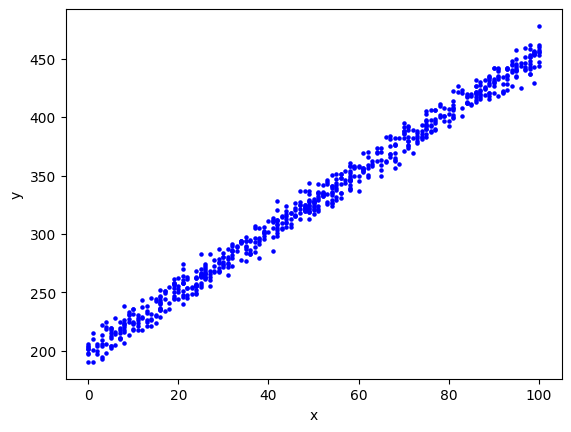

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
import torch.nn as nn
import torch.optim as optim
import torch

dataset = pd.read_csv('train.csv')

dataset.dropna(inplace=True)

x = dataset['x'].to_numpy()
y = dataset['y'].to_numpy()*2.548389 + 200.43289

plt.scatter(x,y,s = 5, color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

C:\Users\rohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


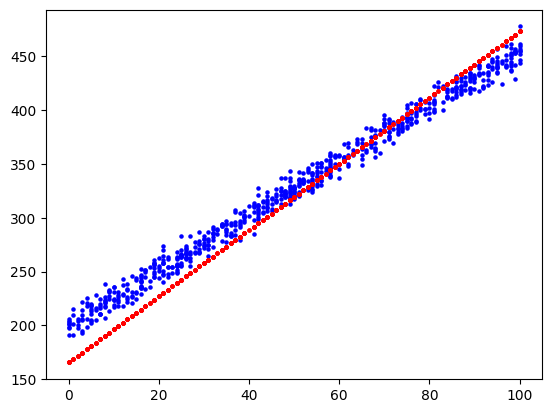

In [174]:
x = x.reshape(-1,1)

Model = SGDRegressor(learning_rate='constant', eta0=0.00001,max_iter=1000)
Model.fit(x,y)

y_pred = Model.predict(x)

plt.scatter(x,y,s = 5, color = 'blue')
plt.scatter(x,y_pred,s = 5, color = 'red')
plt.show()

Step 0, loss=0.104165, a=0.1359, b=0.2454
Step 100, loss=0.003384, a=0.7098, b=0.1284
Step 200, loss=0.000813, a=0.8407, b=0.0583
Step 300, loss=0.000633, a=0.8753, b=0.0398
Step 400, loss=0.000620, a=0.8845, b=0.0349
Step 500, loss=0.000619, a=0.8869, b=0.0336
Step 600, loss=0.000619, a=0.8876, b=0.0332
Step 700, loss=0.000619, a=0.8877, b=0.0332
Step 800, loss=0.000619, a=0.8878, b=0.0331
Step 900, loss=0.000619, a=0.8878, b=0.0331
Original-scale: slope=2.550057, intercept=200.159793


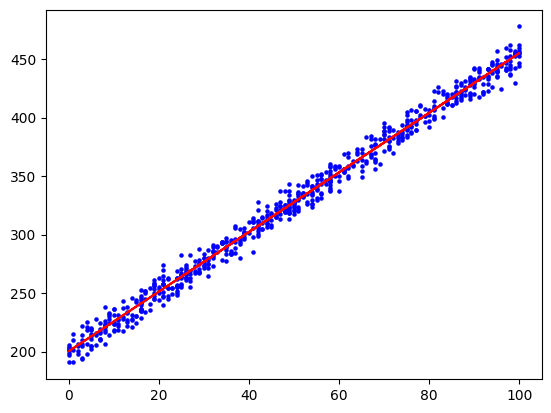

In [175]:
a = nn.Parameter(torch.tensor(0.1))
b = nn.Parameter(torch.tensor(0.2))

x = torch.from_numpy(x).float().view(-1, 1)
y = torch.from_numpy(y).float().view(-1, 1)

# Normalize
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()
x = (x - x_min) / (x_max - x_min)
y = (y - y_min) / (y_max - y_min)

optimizer = optim.SGD([a, b], lr=1e-1)  # now we can use a higher lr
criterion = nn.MSELoss()


for i in range(1000):
    optimizer.zero_grad()
    y_pred = x * a + b
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
        print(f"Step {i}, loss={loss.item():.6f}, a={a.item():.4f}, b={b.item():.4f}")


with torch.no_grad():
    A = a.item() * ((y_max - y_min).item() / (x_max - x_min).item())
    B = y_min.item() + (y_max - y_min).item() * (b.item() - a.item() * (x_min.item() / (x_max - x_min).item()))
print(f"Original-scale: slope={A:.6f}, intercept={B:.6f}")

# Plot in original scale
x_denorm = x * (x_max - x_min) + x_min
y_denorm = y * (y_max - y_min) + y_min
y_pred_denorm = y_pred.detach() * (y_max - y_min) + y_min

plt.scatter(x_denorm.numpy(), y_denorm.numpy(), s=5, color='blue')
plt.plot(x_denorm.numpy(), y_pred_denorm.numpy(), color='red')
plt.show()

